## Data analysis

Goals: perform basic DA tasks on the following dataset

Data source: https://www.kaggle.com/stefanoleone992/adm-project-road-accidents-in-uk


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette='pastel', font_scale = 1.5)
from pylab import rcParams

rcParams['figure.figsize'] = 16,10


In [2]:
data = pd.read_csv('Accidents_categorical.csv')
data.head()

,Accident_Index,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,...,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,201001BS70015,51.492045,-0.178376,London,Urban,A,2,30,Dual carriageway,Wet or damp,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Other/Not known,1896,Heavy oil,Volkswagen,Taxi,Going ahead,Slight
1,201001BS70034,51.485058,-0.168572,London,Urban,B,8,30,Single carriageway,Dry,...,T or staggered junction,Mid Junction - on roundabout or on main road,Front,Other/Not known,599,Petrol,Honda,Motorcycle,Going ahead,Slight
2,201001BS70040,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead,Slight
3,201001BS70045,51.494743,-0.195845,London,Urban,A,7,30,Single carriageway,Wet or damp,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Offside,Other/Not known,649,Petrol,Other,Motorcycle,Moving off,Slight
4,201001BS70060,51.514170,-0.207760,London,Urban,B,5,30,Single carriageway,Wet or damp,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Other/Not known,600,Petrol,Suzuki,Motorcycle,Going ahead,Slight


In [3]:
data.iloc[1]

Accident_Index                                            201001BS70034
Latitude                                                        51.4851
Longitude                                                     -0.168572
Region                                                           London
Urban_or_Rural_Area                                               Urban
X1st_Road_Class                                                       B
Driver_IMD_Decile                                                     8
Speed_limit                                                          30
Road_Type                                            Single carriageway
Road_Surface_Conditions                                             Dry
Weather                                                            Fine
High_Wind                                                            No
Lights                                                         Daylight
Datetime                                            2010-01-24 1

For the purpose of showing geographic data, I need to download a corresponding region. Thus, the extreme coordinates are needed

In [4]:
data['Latitude'].describe()

count    251832.000000
mean         52.341463
std           1.160963
min          49.915001
25%          51.436612
50%          52.131834
75%          53.384119
max          58.893008
Name: Latitude, dtype: float64

In [5]:
data['Longitude'].describe()

count    251832.000000
mean         -1.178765
std           1.215054
min          -6.530040
25%          -2.029776
50%          -1.208209
75%          -0.199958
max           1.758661
Name: Longitude, dtype: float64

The extremes are [49.915001,58.893008] for latitude and [-6.530040,1.758661] for longitude

Maybe lets reduce the data a little bit, let's focus on 2014

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251832 entries, 0 to 251831
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Index           251832 non-null  object 
 1   Latitude                 251832 non-null  float64
 2   Longitude                251832 non-null  float64
 3   Region                   251832 non-null  object 
 4   Urban_or_Rural_Area      251832 non-null  object 
 5   X1st_Road_Class          251832 non-null  object 
 6   Driver_IMD_Decile        251832 non-null  int64  
 7   Speed_limit              251832 non-null  int64  
 8   Road_Type                251832 non-null  object 
 9   Road_Surface_Conditions  251832 non-null  object 
 10  Weather                  251832 non-null  object 
 11  High_Wind                251832 non-null  object 
 12  Lights                   251832 non-null  object 
 13  Datetime                 251832 non-null  object 
 14  Year

In [7]:
data['Datetime'].describe()

count                  251832
unique                 182109
top       2011-03-25 16:30:00
freq                        9
Name: Datetime, dtype: object

In [8]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [9]:
data['Datetime'][0]

Timestamp('2010-01-07 21:35:00')

Let's use only 2014 data

In [10]:
df = data[data['Datetime'].dt.year == 2014]

In [11]:
print(len(df), len(data))

49980 251832


In [12]:
#do older people have problems with complex junctions?
df['Junction_Detail'].unique()

array(['T or staggered junction', 'Roundabout',
       'Not at junction or within 20 metres', 'Crossroads',
       'Private drive or entrance', 'Other junction', 'Slip road',
       'More than 4 arms (not roundabout)'], dtype=object)

In [13]:
df['Age_of_Driver'].value_counts()

3    11084
4     9562
5     8747
2     6460
6     5106
1     4138
7     2893
8     1990
Name: Age_of_Driver, dtype: int64

In [14]:
q = df[(df['Junction_Detail'] == 'Crossroads')].groupby(['Age_of_Driver'], as_index=False)['Accident_Index'].count()
q_1 = pd.DataFrame(data = q.values, columns = ['Category','Count'])
q_1.set_index('Category', inplace=True)
q_1['perc'] = q_1['Count']/len(df[(df['Junction_Detail'] == 'Crossroads')])
q_1

,Count,perc
Category,,
1,369,0.070152
2,678,0.128897
3,1221,0.232129
4,1070,0.203422
5,901,0.171293
6,565,0.107414
7,261,0.049620
8,195,0.037072


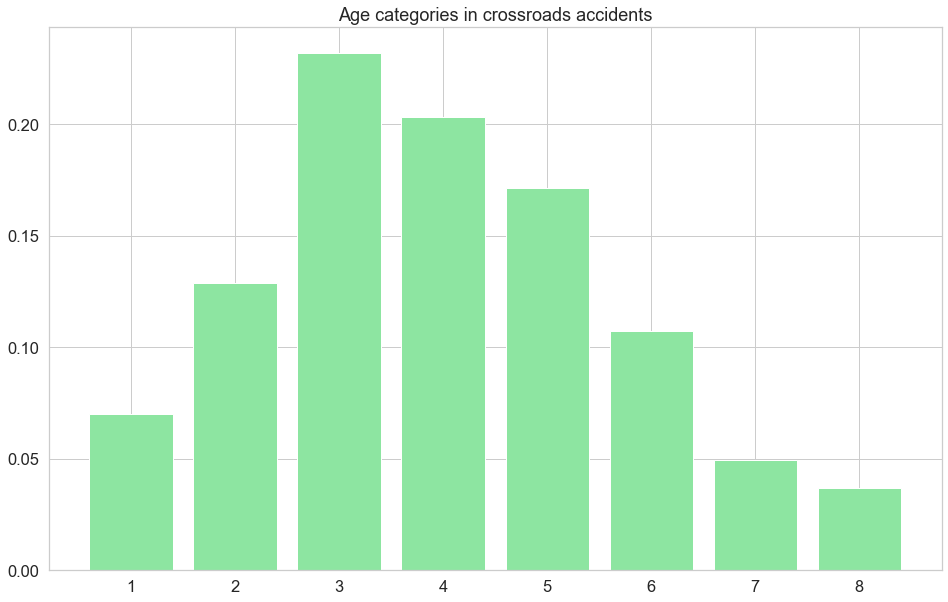

In [15]:
plt.bar(x= q_1.index, height = q_1['perc'], color='g')
plt.title('Age categories in crossroads accidents')
plt.show()

Well but logically there is a certain distribution of age in the driver population. For an objective view I need to test those percentages against general driver age percentages, since there's no information about the group system I can't get the data from any other source

In [16]:
map_bg = plt.imread('./map2.png')

In [17]:
#get top 10 locations
q = df.groupby(['Longitude','Latitude'])['Longitude'].count().sort_values(ascending=False).iloc[:10]
q_2 = pd.DataFrame(data = q)
q_2.columns = ['Count']
q_2.reset_index(inplace=True)
q_2

,Longitude,Latitude,Count
0,0.034998,50.817647,5
1,-0.581748,51.234121,5
2,0.931313,51.306747,5
3,-1.219011,51.177720,5
4,-0.124411,51.445062,5
5,-1.834120,52.454437,5
6,-0.366472,51.370548,5
7,-0.150613,51.466161,4
8,-1.357126,52.103279,4
9,0.087621,51.534464,4


In [18]:
boundaries = (df['Longitude'].min(), df['Longitude'].max(), df['Latitude'].min(), df['Latitude'].max())

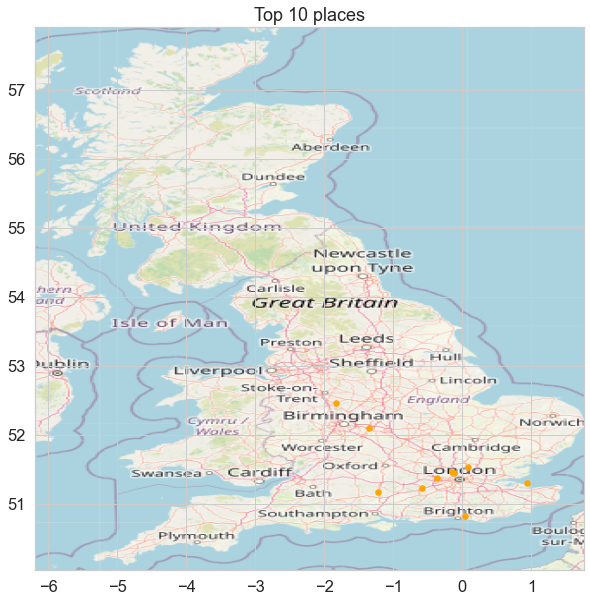

In [19]:
#show top 10 locations
#boundaries in a tuple

fig, ax = plt.subplots()
plt.scatter(q_2['Longitude'], q_2['Latitude'], zorder = 1, alpha = 1, c='orange', s=30)
ax.set_title('Top 10 places')
ax.set_xlim(boundaries[0], boundaries[1])
ax.set_ylim(boundaries[2], boundaries[3])
ax.imshow(map_bg, zorder = 0, extent = boundaries, aspect = 'equal')

Hour of day is a standardized float. Let's find a way to correct this

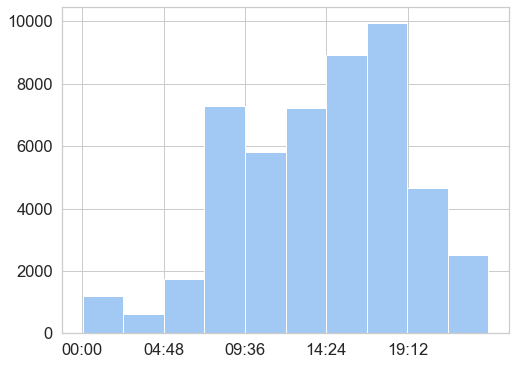

In [20]:
from time import strftime
from time import gmtime
plt.figure(figsize=(8,6))
plt.hist(df['Hour_of_Day'])
plt.xticks(np.arange(0,1,step=0.2), labels = [strftime('%H:%M', gmtime(i*1440*60)) for i in (np.arange(0,1,step=0.2))])
plt.show()

In [21]:
df['approx_time'] = [strftime('%H:%M', gmtime(i*1440*60)) for i in df['Hour_of_Day']]

<ipython-input-21-15cfcf494d04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_time'] = [strftime('%H:%M', gmtime(i*1440*60)) for i in df['Hour_of_Day']]


In [22]:
df['approx_time'].value_counts().iloc[:10]

16:59    484
17:29    398
16:30    397
16:00    393
18:00    357
15:30    346
18:30    330
17:15    327
13:29    321
15:00    317
Name: approx_time, dtype: int64

In [23]:
df['Speed_limit'].value_counts()

30    30395
60     7572
40     4974
70     3624
50     2452
20      963
Name: Speed_limit, dtype: int64

### Speed limits across weather conditions

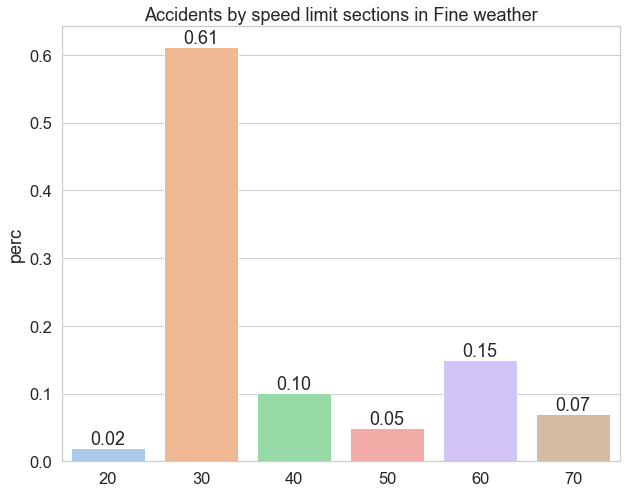

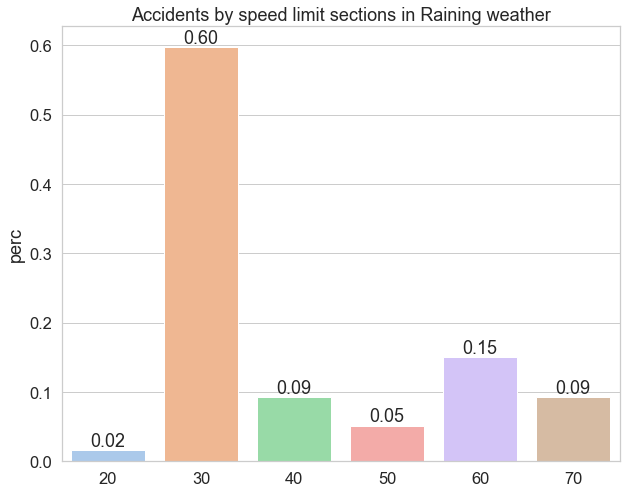

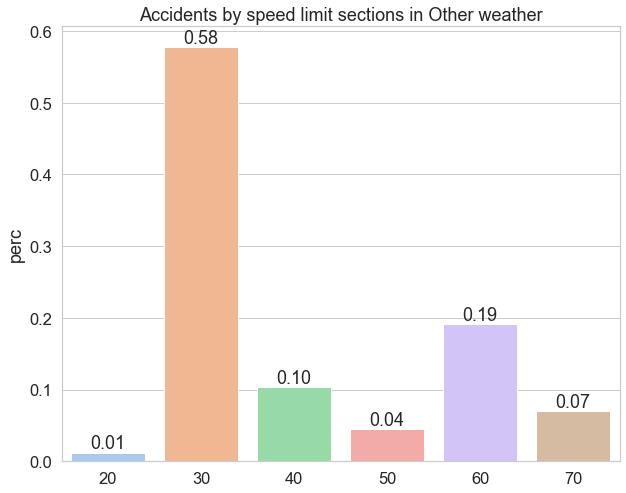

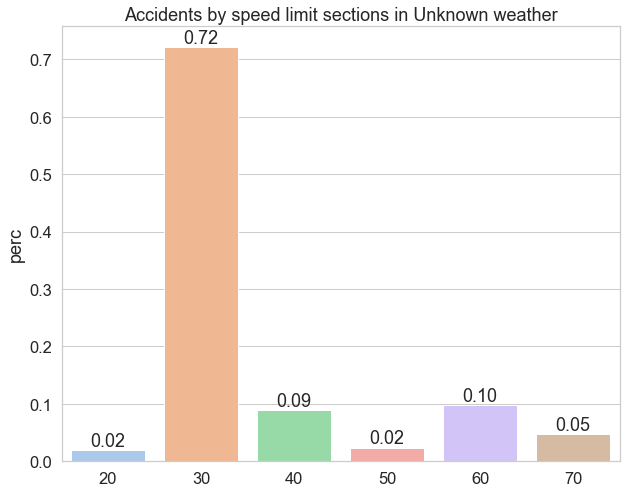

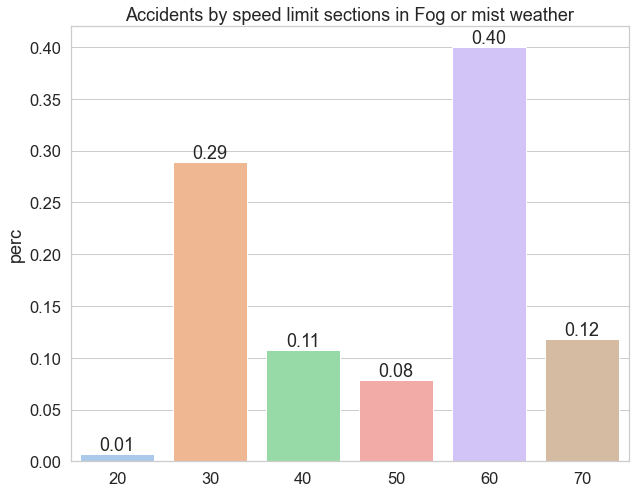

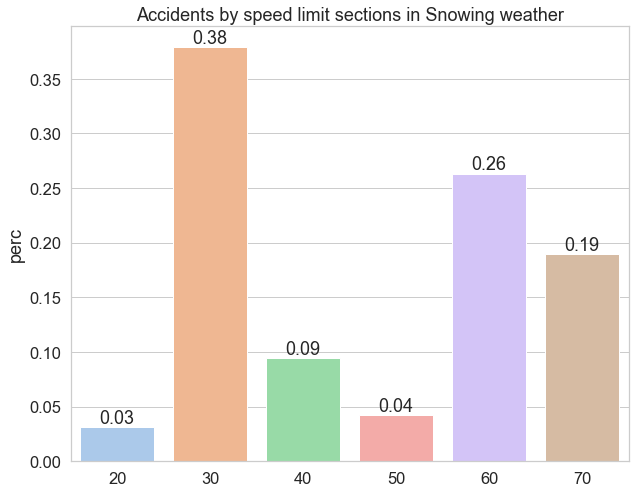

In [24]:
for weather_condition in df['Weather'].unique():
    q = df[df['Weather'] == weather_condition].groupby(['Speed_limit'])['Speed_limit'].count()
    q_q = pd.DataFrame(data = q.values, columns = ['count'])
    q_q['perc'] = q_q['count'] / len(df[df['Weather'] == weather_condition])
    plt.figure(figsize = (10,8))
    splot = sns.barplot(x=q_q.index, y=q_q['perc'])
    
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    plt.xticks(range(len(q_q.index.unique())), labels = q.index)
    plt.title('Accidents by speed limit sections in {} weather'.format(weather_condition))
    plt.show()
    

Now there's an important question to ask. Does the majority of accidents occur at the speed limit of 30, OR (!!!), if there is a speed limit at all, is it mostly 30? Assuming 30 relates to urban areas, where most of the accidents happen...

### Accident severity across junction details

In [25]:
def color_by_value(values, palette_name):
    #normalize - 0 to 1
    normalized = (values-min(values))/(max(values)-min(values))
    indices = np.round(normalized*(len(values)-1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis = 0)

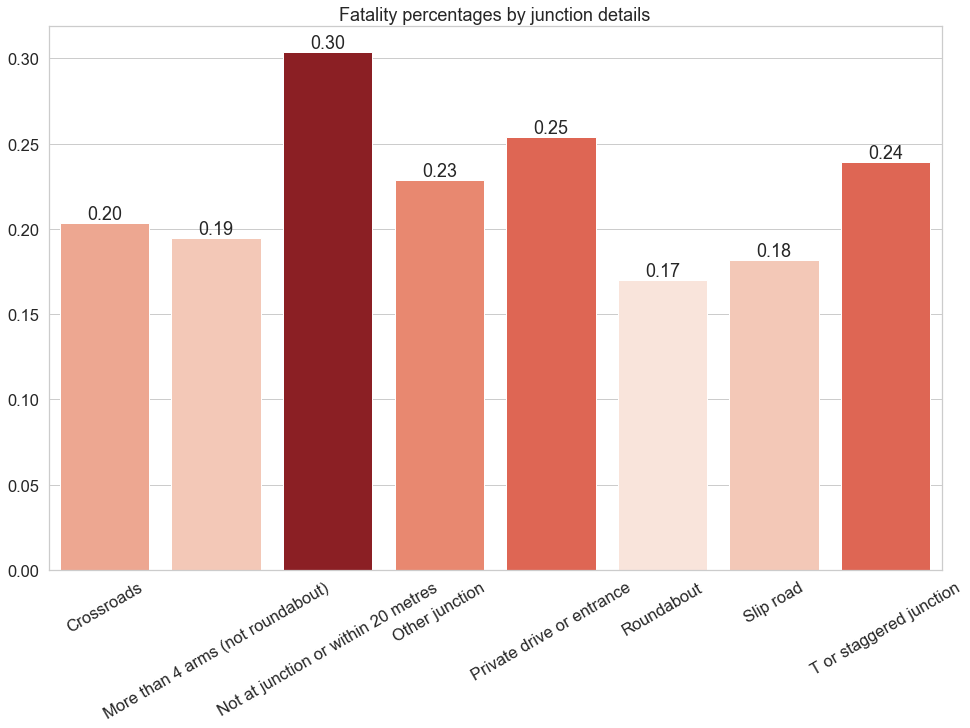

In [26]:
severity_df = pd.concat((df[df['Accident_Severity']=='Fatal_Serious'].groupby(['Junction_Detail'])['Accident_Severity'].count(),
                        df.groupby(['Junction_Detail'])['Accident_Severity'].count()), axis = 1
)
severity_df.columns = ['Fatal','Total']
severity_df['percentage'] = severity_df['Fatal']/severity_df['Total']

plt.figure()
splot2 = sns.barplot(x=severity_df.index, y = severity_df['percentage'], palette = color_by_value(severity_df['percentage'], 
                                                                                                 'Reds'))
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Fatality percentages by junction details')
plt.xticks(rotation = 30)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Well obviously cars don't go that fast in a junction so that makes perfect sense...

### Vehicle age and severity

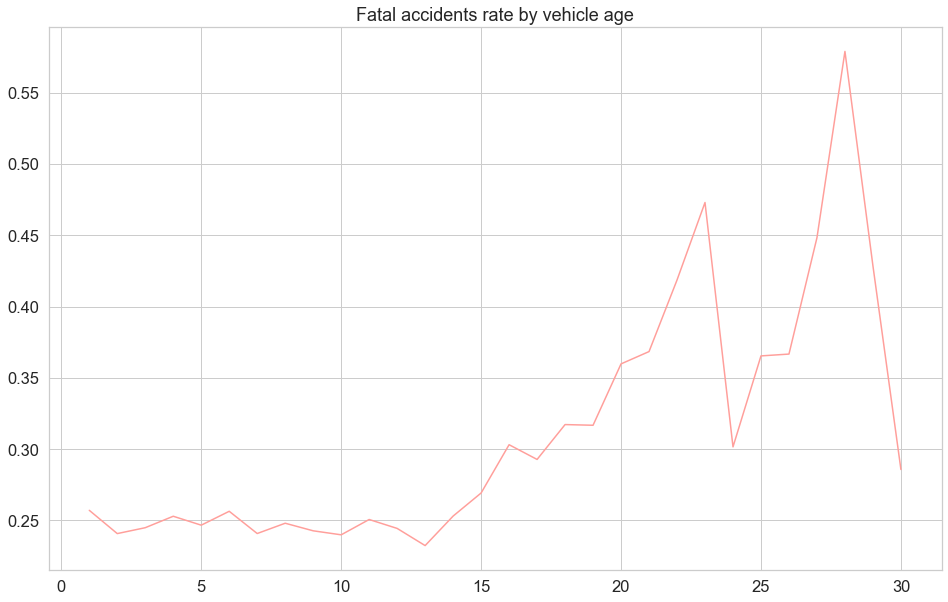

In [27]:
q = df[df['Accident_Severity']=='Fatal_Serious'].groupby('Age_of_Vehicle', as_index = False)['Accident_Severity'].count()
q_q = pd.DataFrame(data = q.values, columns=['Age','Fatal'])
q_q.set_index('Age', inplace=True)
q_q = q_q.join((df['Age_of_Vehicle'].value_counts()))
q_q.rename(columns={'Age_of_Vehicle':'Total_Appearances'}, inplace=True)
q_q['perc_Fatal'] = q_q['Fatal']/q_q['Total_Appearances']

#t_norm = np.ma.masked_where(q_q['perc_Fatal'] > 0.25, np.array(q_q['perc_Fatal']) mf doesn't work
#t_upper = np.ma.masked_where(q_q['perc_Fatal'] < 0.25, q_q['perc_Fatal'])

fig, ax = plt.subplots()
ax.plot(q_q.index, q_q['perc_Fatal'], 'r')
plt.title('Fatal accidents rate by vehicle age')
plt.show()

In [28]:
df.columns

Index(['Accident_Index', 'Latitude', 'Longitude', 'Region',
       'Urban_or_Rural_Area', 'X1st_Road_Class', 'Driver_IMD_Decile',
       'Speed_limit', 'Road_Type', 'Road_Surface_Conditions', 'Weather',
       'High_Wind', 'Lights', 'Datetime', 'Year', 'Season', 'Month_of_Year',
       'Day_of_Month', 'Day_of_Week', 'Hour_of_Day', 'Number_of_Vehicles',
       'Age_of_Driver', 'Age_of_Vehicle', 'Junction_Detail',
       'Junction_Location', 'X1st_Point_of_Impact', 'Driver_Journey_Purpose',
       'Engine_CC', 'Propulsion_Code', 'Vehicle_Make', 'Vehicle_Category',
       'Vehicle_Manoeuvre', 'Accident_Severity', 'approx_time'],
      dtype='object')

### Do younger drivers drive stronger cars?

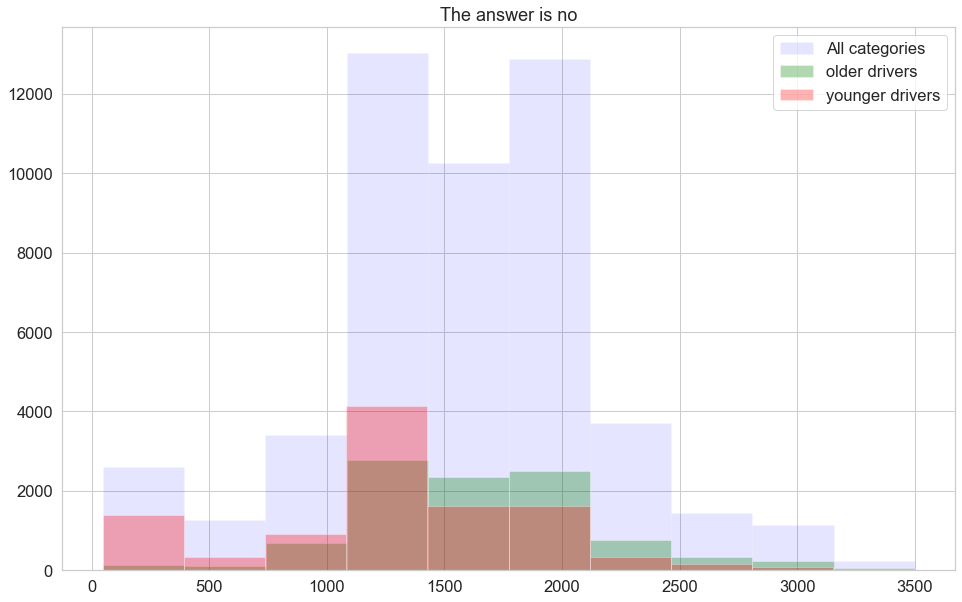

In [29]:
plt.hist(df['Engine_CC'], label = 'All categories', color = 'blue', alpha = 0.1)
plt.hist(df[df['Age_of_Driver'] > 5]['Engine_CC'], label = 'older drivers', color = 'green', alpha = 0.3)
plt.hist(df[df['Age_of_Driver'] <= 2]['Engine_CC'], label = 'younger drivers', color = 'red', alpha = 0.3)
plt.legend()
plt.title('The answer is no')
plt.show() #can show density but the graph gets incomprehensive

What's the influence of wind in different weather conditions?

In [30]:
df.columns

Index(['Accident_Index', 'Latitude', 'Longitude', 'Region',
       'Urban_or_Rural_Area', 'X1st_Road_Class', 'Driver_IMD_Decile',
       'Speed_limit', 'Road_Type', 'Road_Surface_Conditions', 'Weather',
       'High_Wind', 'Lights', 'Datetime', 'Year', 'Season', 'Month_of_Year',
       'Day_of_Month', 'Day_of_Week', 'Hour_of_Day', 'Number_of_Vehicles',
       'Age_of_Driver', 'Age_of_Vehicle', 'Junction_Detail',
       'Junction_Location', 'X1st_Point_of_Impact', 'Driver_Journey_Purpose',
       'Engine_CC', 'Propulsion_Code', 'Vehicle_Make', 'Vehicle_Category',
       'Vehicle_Manoeuvre', 'Accident_Severity', 'approx_time'],
      dtype='object')

In [31]:
df.groupby(['Weather','High_Wind'])['Weather'].count()

Weather      High_Wind
Fine         No           41165
             Yes            552
Fog or mist  No             280
Other        No             741
Raining      No            5822
             Yes            776
Snowing      No              70
             Yes             25
Unknown      No             549
Name: Weather, dtype: int64

Not enough/improper data for this one.

### Fatality by lights? 
correlates with reaction time

In [32]:
df.groupby(['Accident_Severity', 'Lights'])['Lights'].count()

Accident_Severity  Lights                     
Fatal_Serious      Darkness - lighting unknown      126
                   Darkness - lights               2470
                   Darkness - no lights            1125
                   Daylight                        8842
Slight             Darkness - lighting unknown      364
                   Darkness - lights               7194
                   Darkness - no lights            1774
                   Daylight                       28085
Name: Lights, dtype: int64

In [33]:
df[df['Accident_Severity']=='Fatal_Serious'].groupby('Lights')['Lights'].count()

Lights
Darkness - lighting unknown     126
Darkness - lights              2470
Darkness - no lights           1125
Daylight                       8842
Name: Lights, dtype: int64

In [34]:
df.groupby('Lights')['Lights'].count()

Lights
Darkness - lighting unknown      490
Darkness - lights               9664
Darkness - no lights            2899
Daylight                       36927
Name: Lights, dtype: int64

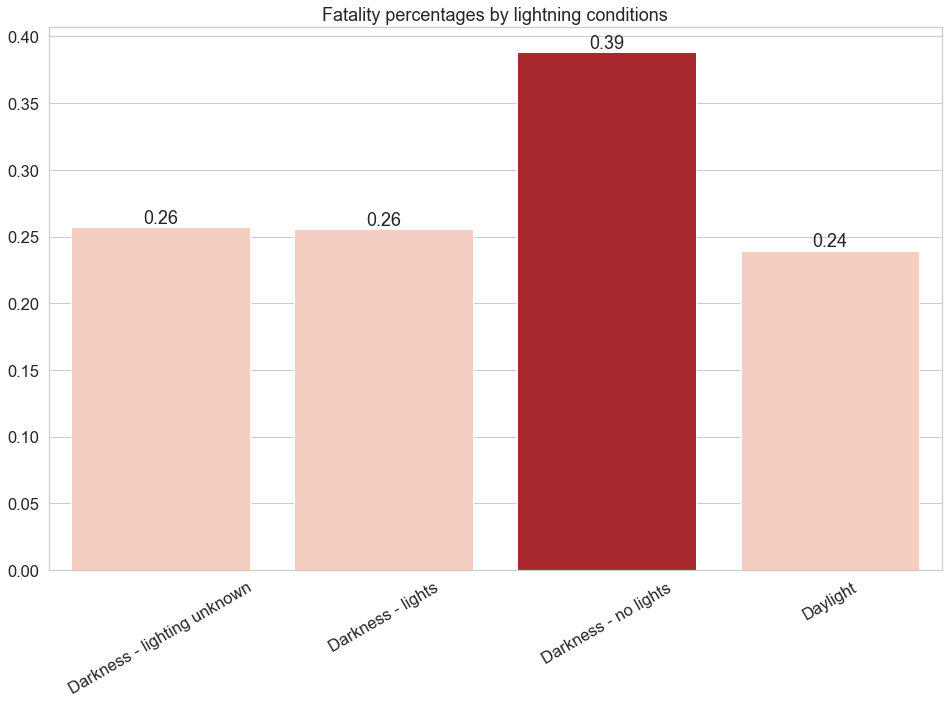

In [35]:
fatality_light = pd.concat((df[df['Accident_Severity']=='Fatal_Serious'].groupby('Lights')['Lights'].count(),
                            df.groupby('Lights')['Lights'].count()), axis = 1)
fatality_light.columns = ['Fatal','Total']
fatality_light['percentage'] = fatality_light['Fatal']/fatality_light['Total']

plt.figure()
splot3 = sns.barplot(x=fatality_light.index, y = fatality_light['percentage'], palette = color_by_value(fatality_light['percentage'], 
                                                                                                 'Reds'))
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Fatality percentages by lightning conditions')
plt.xticks(rotation = 30)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Let's find more interesting stuff

I've found some interesting, useful information, but nothing really that revolutionary. Let's use some basic statistics to dive deeper into fatality. But that needs some data manipulation

let's use a simple lightGBM feature importances method, without any complicated hyperparameter tuning.

In [36]:
raw = df.copy()
raw.columns

Index(['Accident_Index', 'Latitude', 'Longitude', 'Region',
       'Urban_or_Rural_Area', 'X1st_Road_Class', 'Driver_IMD_Decile',
       'Speed_limit', 'Road_Type', 'Road_Surface_Conditions', 'Weather',
       'High_Wind', 'Lights', 'Datetime', 'Year', 'Season', 'Month_of_Year',
       'Day_of_Month', 'Day_of_Week', 'Hour_of_Day', 'Number_of_Vehicles',
       'Age_of_Driver', 'Age_of_Vehicle', 'Junction_Detail',
       'Junction_Location', 'X1st_Point_of_Impact', 'Driver_Journey_Purpose',
       'Engine_CC', 'Propulsion_Code', 'Vehicle_Make', 'Vehicle_Category',
       'Vehicle_Manoeuvre', 'Accident_Severity', 'approx_time'],
      dtype='object')

In [37]:
#lets keep area, class, road type, surface, weather, wind, lights, approx_time (original format), vehicle age, driver age,
# engine_cc, and accident severity as target

raw = raw[['Urban_or_Rural_Area','Road_Type','Road_Surface_Conditions','Weather','High_Wind','Lights',
          'Hour_of_Day', 'Age_of_Vehicle','Age_of_Driver','Engine_CC','X1st_Point_of_Impact','Vehicle_Category',
           'Accident_Severity']]

In [38]:
#lightGBM does not need 1h encoding since its a tree-based classifier/regressor
raw['Urban_or_Rural_Area'] = raw['Urban_or_Rural_Area'].map({'Rural':1,'Urban':2})
raw['Road_Type'] = raw['Road_Type'].map({'Single carriageway':1,'Dual carriageway':2,'Roundabout':3,'One way street':4,
                                        'Slip road': 5})
raw['Road_Surface_Conditions'] = raw['Road_Surface_Conditions'].map({'Dry':1,'Wet or damp':2,'Frost or ice':3,
                                                                     'Flood over 3cm. deep':4, 'Snow': 5})
raw['Weather'] = raw['Weather'].map({'Fine':1,'Raining':2,'Other':3,'Unknown':4,
                                        'Fog or mist': 5,'Snowing':6})
raw['High_Wind'] = raw['High_Wind'].map({'Yes':1,'No':0})
raw['Lights'] = raw['Lights'].map({'Daylight':1,'Darkness - lights':2,'Darkness - no lights':3,'Darkness - lighting unknown':4})
raw['X1st_Point_of_Impact'] = raw['X1st_Point_of_Impact'].map({'Front':1,'Back':2,'Offside':3,
                                                                     'Nearside':4, 'Did not impact': 5})
raw['Vehicle_Category'] = raw['Vehicle_Category'].map({'Car':1,'Motorcycle':2,'Van':3,
                                                                     'Taxi':4, 'Other': 5,'Bus/minibus':6})
raw['Accident_Severity'] = raw['Accident_Severity'].map({'Slight':0,'Fatal_Serious':1})

In [39]:
len(raw)

49980

### LightGBM feature importances

In [40]:
#50 thousand, thats enough for a NN... but nah
import lightgbm as lgb
from sklearn.model_selection import train_test_split
X = raw.copy()
y = X.pop('Accident_Severity')
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)

In [41]:
train_ds = lgb.Dataset(X_train, label = y_train)
valid_ds = lgb.Dataset(X_valid, label = y_valid)

In [42]:
#whats the metric? is dataset balanced?
y.value_counts()

0    37417
1    12563
Name: Accident_Severity, dtype: int64

In [43]:
#auc it is
params = {}
params['learning_rate'] = 0.5
params['boosting_type'] = 'gbdt' #default
params['objective'] = 'binary'
params['metric'] = 'auc' #the dataset is imbalanced
params['max_depth'] = 10
params['num_threads'] = -1 #doesnt really make any difference I guess
params['num_leaves'] = 31 #def 
params['bagging'] = 1

In [44]:
clf = lgb.train(params, train_ds,100,valid_sets = [valid_ds],early_stopping_rounds = 4, verbose_eval = 10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11350, number of negative: 33632
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 44982, number of used features: 12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252323 -> initscore=-1.086260
[LightGBM] [Info] Start training from score -1.086260
Training until validation scores don't improve for

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

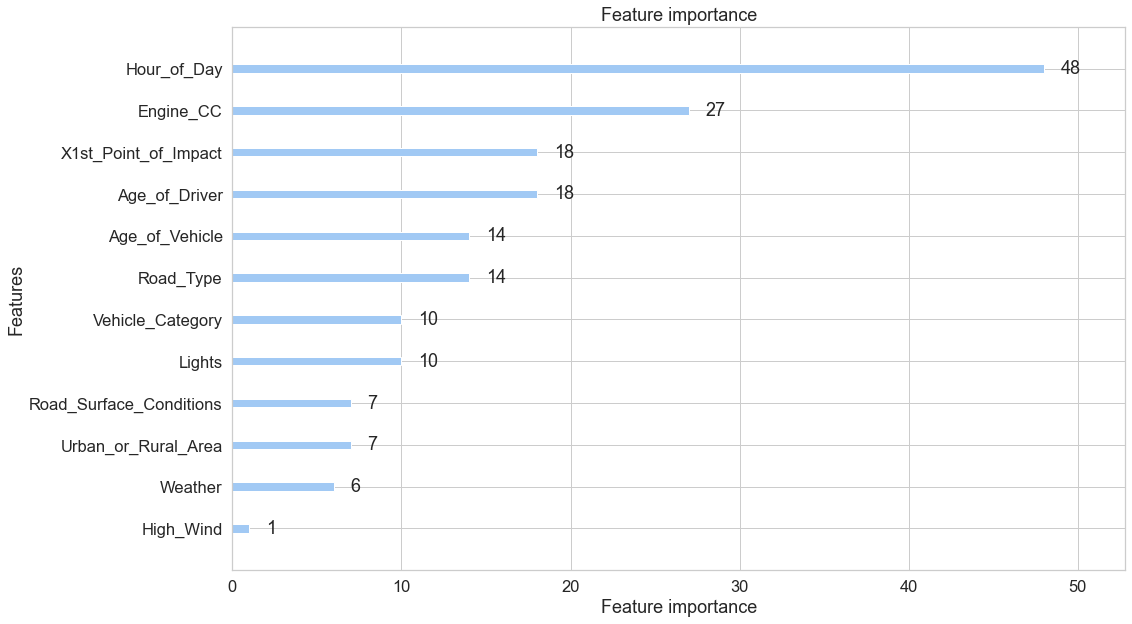

In [45]:
#that's poor but that does not matter
lgb.plot_importance(clf)

That makes sense since, as seen in one of the graphs above, accidents mostly occur before and after general working hours. Let's test again with something else.

### Pearson correlation

In [46]:
num_feats = 4
def cor_selector(X, y, num_feats=num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)


4 selected features
['Vehicle_Category', 'Lights', 'Engine_CC', 'Urban_or_Rural_Area']


### Chisq

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
num_feats = 4 
X_norm = MinMaxScaler().fit_transform(X) #don't need to save the scaler
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

4 selected features
['Urban_or_Rural_Area', 'Road_Type', 'Lights', 'Vehicle_Category']


### RFE
Recursive feature elimination

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 12 features.
4 selected features
['Road_Type', 'Lights', 'Engine_CC', 'Vehicle_Category']


### semi-conclusion for this part

Fairly interesting. Classical statistical methods (and RFE) basically concur regarding the most important features, which do not appear in the top places in the LGB algorithm.

Of course, the features I chose for this features importance analysis are not the only things that can make a significant change. First of all, I have no idea how the age groups are divided.

And the most obvious thing - the categorical features are encoded as categorical features. The three fairly linear methods used **assume linearity** and some kind of value hierarchy within the categorical values, to be fully objective I would need the features to be one-hot-encoded, which would increase the dimensionality, sparsity and eventually would bring no use at all, because the values would be so small it would be hard to classify them as significant in comparison to the others. Gotta love the tree based algorithms.

**Fun fact**: if I remove vehicle type (which needs to be there since there's engine cc value and the information only makes sense if those two are together), the importances change fairly

#### Therefore only LightGBM output matters in this case

#### Points of impact in fatal/severe accidents
where there are at least two vehicles (because one vehicle can hit an object (a tree for instance) frontally and the statistic would be pointless)

In [49]:
df[(df['Accident_Severity']=='Fatal_Serious') & (df['Number_of_Vehicles']>=2)].groupby('X1st_Point_of_Impact')\
    ['X1st_Point_of_Impact'].count()

X1st_Point_of_Impact
Back               876
Did not impact     348
Front             4771
Nearside          1066
Offside           1528
Name: X1st_Point_of_Impact, dtype: int64

The most of the fatal/severe classified accidents happened after a frontal contact, which makes sense, since that's when the momentum of both (or more) vehicles sum up and have devastative consequences.

The curious number is, however, amount of severe accidents that happened without any impact. Did the road surface have anything to do in those cases, for instance?

In [50]:
df[(df['Accident_Severity']=='Fatal_Serious') & (df['Number_of_Vehicles']>=2) & (df['X1st_Point_of_Impact']=='Did not impact')]\
    .groupby('Road_Surface_Conditions')['Road_Surface_Conditions'].count()

Road_Surface_Conditions
Dry             251
Frost or ice      7
Wet or damp      90
Name: Road_Surface_Conditions, dtype: int64

...or weather?

In [51]:
df[(df['Accident_Severity']=='Fatal_Serious') & (df['Number_of_Vehicles']>=2) & (df['X1st_Point_of_Impact']=='Did not impact')]\
    .groupby('Weather')['Weather'].count()

Weather
Fine           303
Fog or mist      3
Other            8
Raining         29
Unknown          5
Name: Weather, dtype: int64

No significant numbers, mostly correlated with the query specifics... What about the maneuvre?

In [52]:
df[(df['Accident_Severity']=='Fatal_Serious') & (df['Number_of_Vehicles']>=2) & (df['X1st_Point_of_Impact']=='Did not impact')]\
    .groupby('Vehicle_Manoeuvre')['Vehicle_Manoeuvre'].count()

Vehicle_Manoeuvre
Changing lane            6
Going ahead            169
Moving off              18
Overtaking              13
Parked                  31
Reversing                5
Slowing or stopping     18
Turning left            16
Turning right           44
U-turn                   3
Waiting to go           25
Name: Vehicle_Manoeuvre, dtype: int64

### Semi-conclusion for this investigation

Well that's ridiculous, there are accidents with no impact where parked cars are included. I suspected attention issue and accidents in consequences of wild maneuvres, but no, the 'zero impact' category remains being a peculiar matter. Of course, the accident indices repeat sometimes, so the explanation might lie in the fact that the severity was documented on the other side of the accident. However, since the data is not described well, I can only assume such things...